In [37]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [38]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])

In [6]:
trainset = datasets.MNIST('/Users/shakhzod/Documents/Python/MachineLearning',
                          download=True,train=True,transform=transform)
valset = datasets.MNIST('/Users/shakhzod/Documents/Python/MachineLearning',
                        download=True,train=False,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
valloader = torch.utils.data.DataLoader(valset,batch_size = 64, shuffle = True)

Extracting /Users/shakhzod/Documents/Python/MachineLearning/MNIST/raw/train-images-idx3-ubyte.gz to /Users/shakhzod/Documents/Python/MachineLearning/MNIST/raw


Extracting /Users/shakhzod/Documents/Python/MachineLearning/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/shakhzod/Documents/Python/MachineLearning/MNIST/raw


Extracting /Users/shakhzod/Documents/Python/MachineLearning/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/shakhzod/Documents/Python/MachineLearning/MNIST/raw


Extracting /Users/shakhzod/Documents/Python/MachineLearning/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/shakhzod/Documents/Python/MachineLearning/MNIST/raw
Processing...
Done!





In [39]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


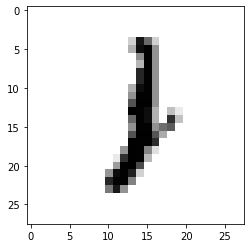

In [40]:
plt.imshow(images[0].numpy().squeeze(),cmap='gray_r')

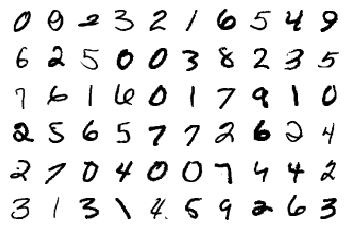

In [41]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6,10,index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(),cmap='gray_r')

In [42]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [43]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate loss

In [44]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0025,  0.0025,  0.0025,  ...,  0.0025,  0.0025,  0.0025],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        ...,
        [-0.0038, -0.0038, -0.0038,  ..., -0.0038, -0.0038, -0.0038],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012]])


In [45]:
optimizer = optim.SGD(model.parameters(), lr = 0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output,labels)
        
        #Backprop
        loss.backward()
        
        #Optimezer
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        print(f"Epoch {e} - training loss: {running_loss/len(trainloader)}")
        
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - training loss: 0.6433699243088394
Epoch 1 - training loss: 0.28494436347058844
Epoch 2 - training loss: 0.22156307644951445
Epoch 3 - training loss: 0.178130910364486
Epoch 4 - training loss: 0.1492584778138919
Epoch 5 - training loss: 0.12673060629151459
Epoch 6 - training loss: 0.11104445583097684
Epoch 7 - training loss: 0.09813837668916056
Epoch 8 - training loss: 0.08789975627530008
Epoch 9 - training loss: 0.07839038093357897
Epoch 10 - training loss: 0.07225385080027118
Epoch 11 - training loss: 0.06477664721492273
Epoch 12 - training loss: 0.06080772978703438
Epoch 13 - training loss: 0.0552905257989857
Epoch 14 - training loss: 0.05036021821197869

Training Time (in minutes) = 2.3818209489186604


In [46]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 2


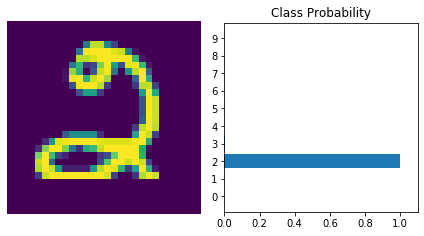

In [47]:
images,labels = next(iter(valloader))
img = images[0].view(1,784)

with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [48]:
correct_count, all_count = 0,0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1,784)
        with torch.no_grad():
            logps = model(img)
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if true_label == pred_label:
            correct_count += 1
        all_count += 1
print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9768
